In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.datasets  import load_digits


digits = load_digits()

In [4]:
print('Image Data Shape', digits.data.shape)
print("Label Data Shape", digits.target.shape)


Image Data Shape (1797, 64)
Label Data Shape (1797,)


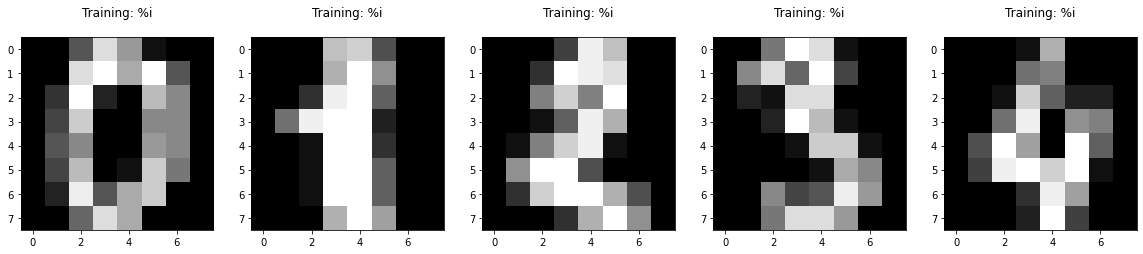

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize= (20,4))

for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5,index + 1)
    plt.imshow(np.reshape(image,(8,8)),cmap = plt.cm.gray)
    plt.title("Training: %i\n")

In [6]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train, y_test  =train_test_split(digits.data, digits.target, test_size = 0.2, random_state =2)

In [7]:
print(x_train.shape)

(1437, 64)


In [8]:
print(y_train.shape)

(1437,)


In [9]:
print(x_test.shape)

(360, 64)


In [10]:
print(y_test.shape)

(360,)


In [11]:
from sklearn.linear_model import LogisticRegression

a= LogisticRegression()
a.fit(x_train, y_train)

C:\Users\hi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
#predicts for one obervation(image)

print(a.predict(x_test[0].reshape(1,-1)))

[4]


In [13]:
# testing for 0 - 9 numbers
a.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [20]:
predictions = a.predict(x_test)

In [21]:
score= a.score(x_test,y_test)
print(score)

0.9444444444444444


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[31,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  1,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 31,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  0,  0,  1,  2,  0],
       [ 0,  0,  0,  0, 31,  0,  0,  0,  3,  1],
       [ 0,  1,  0,  0,  1, 41,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 33,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 35,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  1, 25]], dtype=int64)

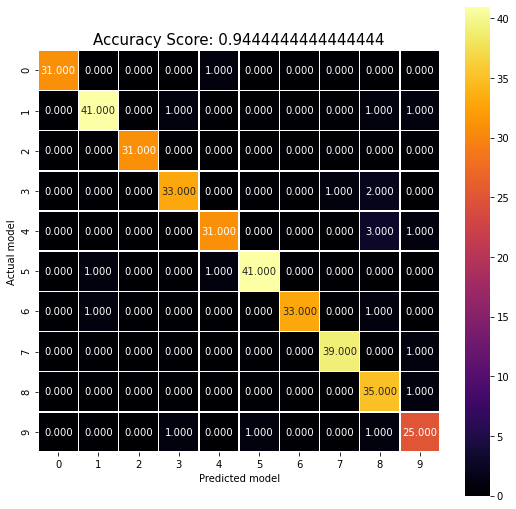

In [23]:
plt.figure(figsize= (9,9))
sns.heatmap(cm, annot=True, fmt=".3f",linewidth = .5, square = True,cmap = "inferno")
plt.xlabel('Predicted model')
plt.ylabel('Actual model')
all_sample_title = "Accuracy Score: {0}".format(score)
plt.title(all_sample_title, size = 15);

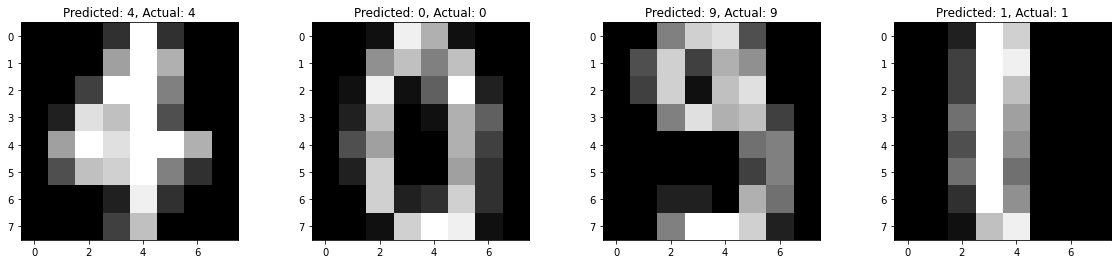

In [27]:
index = 0
misclassifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict == actual:
        misclassifiedIndex.append(index)
    index +=1
    
plt.figure(figsize=(20,4))

for plotIndex, wrong in enumerate(misclassifiedIndex[0:4]):
    plt.subplot(1,4, plotIndex +1)
    plt.imshow(np.reshape(x_test[wrong],(8,8)),cmap = plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(predictions[wrong], y_test[wrong]))